<a href="https://colab.research.google.com/github/mikelalvarezbejarano/sis420/blob/main/pregunta1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Alvarez Bejarano Mikel
Carrera: Ing. Sistemas

In [2]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
#Carga de dataset
data = pd.read_csv('/content/drive/MyDrive/dataset/datasetssegundoparcial/brca.csv', header=0)

In [63]:
data.dtypes
data.any

<bound method NDFrame._add_numeric_operations.<locals>.any of      Unnamed: 0  x.radius_mean  x.texture_mean  x.perimeter_mean  x.area_mean  \
0             1         13.540           14.36             87.46        566.3   
1             2         13.080           15.71             85.63        520.0   
2             3          9.504           12.44             60.34        273.9   
3             4         13.030           18.42             82.61        523.8   
4             5          8.196           16.84             51.71        201.9   
..          ...            ...             ...               ...          ...   
564         565         20.920           25.09            143.00       1347.0   
565         566         21.560           22.39            142.00       1479.0   
566         567         20.130           28.25            131.20       1261.0   
567         568         16.600           28.08            108.30        858.1   
568         569         20.600           29.33 

In [33]:
print(data)

     Unnamed: 0  x.radius_mean  x.texture_mean  x.perimeter_mean  x.area_mean  \
0             1         13.540           14.36             87.46        566.3   
1             2         13.080           15.71             85.63        520.0   
2             3          9.504           12.44             60.34        273.9   
3             4         13.030           18.42             82.61        523.8   
4             5          8.196           16.84             51.71        201.9   
..          ...            ...             ...               ...          ...   
564         565         20.920           25.09            143.00       1347.0   
565         566         21.560           22.39            142.00       1479.0   
566         567         20.130           28.25            131.20       1261.0   
567         568         16.600           28.08            108.30        858.1   
568         569         20.600           29.33            140.10       1265.0   

     x.smoothness_mean  x.c

muestra toda la informacion del dataset columnas 

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           569 non-null    int64  
 1   x.radius_mean        569 non-null    float64
 2   x.texture_mean       569 non-null    float64
 3   x.perimeter_mean     569 non-null    float64
 4   x.area_mean          569 non-null    float64
 5   x.smoothness_mean    569 non-null    float64
 6   x.compactness_mean   569 non-null    float64
 7   x.concavity_mean     569 non-null    float64
 8   x.concave_pts_mean   569 non-null    float64
 9   x.symmetry_mean      569 non-null    float64
 10  x.fractal_dim_mean   569 non-null    float64
 11  x.radius_se          569 non-null    float64
 12  x.texture_se         569 non-null    float64
 13  x.perimeter_se       569 non-null    float64
 14  x.area_se            569 non-null    float64
 15  x.smoothness_se      569 non-null    flo

cambiamos los dtype a valores buenos

In [35]:
columnas_categoricas = data.select_dtypes(include=['object']).columns
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [36]:
#Procesamiento de frases
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [37]:
#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

vemos el cambio de dtype de algunas columnas como por ejemplo de objet = int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           569 non-null    int64  
 1   x.radius_mean        569 non-null    float64
 2   x.texture_mean       569 non-null    float64
 3   x.perimeter_mean     569 non-null    float64
 4   x.area_mean          569 non-null    float64
 5   x.smoothness_mean    569 non-null    float64
 6   x.compactness_mean   569 non-null    float64
 7   x.concavity_mean     569 non-null    float64
 8   x.concave_pts_mean   569 non-null    float64
 9   x.symmetry_mean      569 non-null    float64
 10  x.fractal_dim_mean   569 non-null    float64
 11  x.radius_se          569 non-null    float64
 12  x.texture_se         569 non-null    float64
 13  x.perimeter_se       569 non-null    float64
 14  x.area_se            569 non-null    float64
 15  x.smoothness_se      569 non-null    flo

imprime toda las columnas existente

In [39]:
print(data.columns)

Index(['Unnamed: 0', 'x.radius_mean', 'x.texture_mean', 'x.perimeter_mean',
       'x.area_mean', 'x.smoothness_mean', 'x.compactness_mean',
       'x.concavity_mean', 'x.concave_pts_mean', 'x.symmetry_mean',
       'x.fractal_dim_mean', 'x.radius_se', 'x.texture_se', 'x.perimeter_se',
       'x.area_se', 'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst', 'y'],
      dtype='object')


relizamos el llenamos de algunas filas sin datos y rellenamos con datos media MEAN

In [ ]:
#llenar datos vacios
vacios = ['x.radius_men','x.texture_mean', 'x.perimeter_mean', 'x.area_mean', 'x.smoothness_mean','']
media_columnas = data[vacios].mean()
data[vacios] = data[vacios].fillna(media_columnas)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           569 non-null    int64  
 1   x.radius_mean        569 non-null    float64
 2   x.texture_mean       569 non-null    float64
 3   x.perimeter_mean     569 non-null    float64
 4   x.area_mean          569 non-null    float64
 5   x.smoothness_mean    569 non-null    float64
 6   x.compactness_mean   569 non-null    float64
 7   x.concavity_mean     569 non-null    float64
 8   x.concave_pts_mean   569 non-null    float64
 9   x.symmetry_mean      569 non-null    float64
 10  x.fractal_dim_mean   569 non-null    float64
 11  x.radius_se          569 non-null    float64
 12  x.texture_se         569 non-null    float64
 13  x.perimeter_se       569 non-null    float64
 14  x.area_se            569 non-null    float64
 15  x.smoothness_se      569 non-null    flo

In [42]:
columnas_seleccionadas = list(range(0, 3)) + list(range(4, 22))
X = data.iloc[:, columnas_seleccionadas]
y = data.iloc[:, 3]
m = y.size

In [43]:
print(X)
print('*'*15)
print(y)

     Unnamed: 0  x.radius_mean  x.texture_mean  x.area_mean  \
0             1         13.540           14.36        566.3   
1             2         13.080           15.71        520.0   
2             3          9.504           12.44        273.9   
3             4         13.030           18.42        523.8   
4             5          8.196           16.84        201.9   
..          ...            ...             ...          ...   
564         565         20.920           25.09       1347.0   
565         566         21.560           22.39       1479.0   
566         567         20.130           28.25       1261.0   
567         568         16.600           28.08        858.1   
568         569         20.600           29.33       1265.0   

     x.smoothness_mean  x.compactness_mean  x.concavity_mean  \
0              0.09779             0.08129           0.06664   
1              0.10750             0.12700           0.04568   
2              0.10240             0.06492         

In [44]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma


In [45]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     Unnamed: 0  x.radius_mean  x.texture_mean  x.area_mean  \
0             1         13.540           14.36        566.3   
1             2         13.080           15.71        520.0   
2             3          9.504           12.44        273.9   
3             4         13.030           18.42        523.8   
4             5          8.196           16.84        201.9   
..          ...            ...             ...          ...   
564         565         20.920           25.09       1347.0   
565         566         21.560           22.39       1479.0   
566         567         20.130           28.25       1261.0   
567         568         16.600           28.08        858.1   
568         569         20.600           29.33       1265.0   

     x.smoothness_mean  x.compactness_mean  x.concavity_mean  \
0              0.09779             0.08129           0.06664   
1              0.10750             0.12700           0.04568   
2              0.10240             0.06492         

In [46]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [47]:
print(X)

[[ 1.         -1.72900945 -0.16679919 ... -0.08987642 -0.56544939
  -0.24004796]
 [ 1.         -1.72292139 -0.29744572 ... -0.4555335  -0.51816798
  -0.3663683 ]
 [ 1.         -1.71683333 -1.31308049 ... -0.03296953 -0.3127775
  -1.2506107 ]
 ...
 [ 1.          1.71683333  1.70485436 ... -0.1891608  -0.49055563
   1.53672015]
 [ 1.          1.72292139  0.70228425 ... -0.89141612  0.03672674
   0.56136143]
 [ 1.          1.72900945  1.83834103 ...  0.32663363  0.90405707
   1.96123934]]


In [48]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J

In [49]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 9.17431115e+01  2.62726374e-01  7.73276247e+00 -2.08587833e-01
  6.73580763e+00 -2.31387300e-01  1.76984266e+00  1.34768593e+00
  2.93810060e+00 -4.27563672e-01 -2.67668682e+00 -6.03983808e-01
 -6.09627287e-02 -9.97111826e-02  1.93042502e-01 -5.05484288e-01
  4.24073365e-01 -8.09133190e-01  4.73392279e-01  3.02187828e-01
  4.02344113e-01  4.76451639e+00]
El valor predecido es (usando el descenso por el gradiente): -905097477


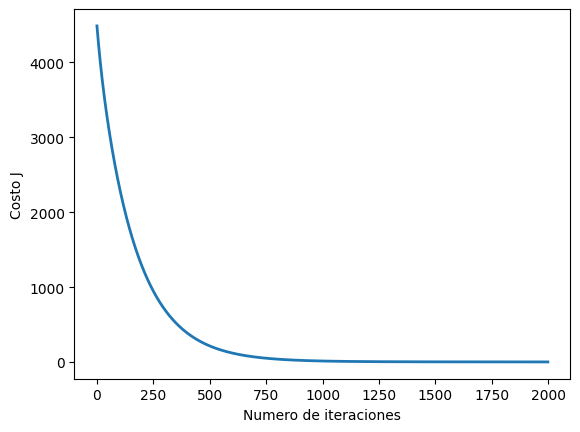

In [50]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.003
num_iters = 2000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(22)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1, 0, 2016, 1, 262.0, 63, 0.01, 71.279624, 65.0, 1153, 19.1, 84, 6.0, 8.15, 64.0, 0.1, 584.259211, 33736484.0, 17.3, 17.2, 0.478, 10.2]
X_array[1:22] = (X_array[1:22] - mu) / sigma
value = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.0f}'.format(value))

In [51]:
X_array = [1, 0, 2016, 1, 262.0, 63, 0.01, 71.279624, 65.0, 1153, 19.1, 84, 6.0, 8.15, 64.0, 0.1, 584.259211, 33736484.0, 17.3, 17.2, 0.478, 10.2]
X_array[1:22] = (X_array[1:22] - mu) / sigma

In [52]:
X_array[0:22]

[1,
 -1.7350975131910282,
 568.5602680384612,
 -4.256123979316868,
 -1.1174169266779346,
 4476.565320959351,
 -1.787901219329739,
 893.7987466359732,
 1675.347031752281,
 42088.7632633699,
 2698.7215351993764,
 301.7112906395825,
 8.678272794344476,
 2.615712427768985,
 0.5206247151739294,
 30.987596733479027,
 32652.554250415677,
 1118601372.8290713,
 2804.3137669917132,
 2080.0630304476704,
 179.3687140413122,
 -1.2568231802148053]

In [54]:
#Carga de dataset
data = pd.read_csv('/content/drive/MyDrive/dataset/datasetssegundoparcial/brca.csv', header=0)
columnas_seleccionadas = list(range(0, 3)) + list(range(4, 22))
X = data.iloc[:, columnas_seleccionadas]
y = data.iloc[:, 3]
m = y.size

In [55]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [56]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 0, 2016, 1, 262.0, 63, 0.01, 71.279624, 65.0, 1153, 19.1, 84, 6.0, 8.15, 64.0, 0.1, 584.259211, 33736484.0, 17.3, 17.2, 0.478, 10.2]
value = np.dot(X_array, theta) 

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): {:.0f}'.format(value))

Theta calculado a partir de la ecuación de la normal: [-3.44146597e-04  6.48309716e+00  4.44155810e-03  1.18417007e-03
 -5.93445197e+00  2.86546214e+01  1.12440426e+01 -1.62135637e+00
 -8.54769349e-01 -3.33562665e+01 -4.26133423e+00 -4.04453293e-03
  6.31852624e-01  3.08733911e-03  1.25427446e+01 -8.02195029e+00
 -9.88055920e+00 -8.38977689e+00 -3.05491495e-01  6.14377433e+01
 -8.42962438e-02]


ValueError: ignored